## Logistic Regression For binary classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the input training file and create the data frame
tweets = pd.read_csv('../Data/clean_train.csv', header = 'infer', delimiter = ',')
train_ds = tweets['text']
train_labels = tweets['target']

In [3]:
# Perform Feature Engineering and k-fold validation
# Validation error: Tells us how well the model generalizes in the unseen data. 
# Traning error: Tells us how well the model learns the input data.

from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    training_errors = []
    training_accuracy = list()
    validation_accuracy = list()
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Creating BoW 
        cv = CountVectorizer()
        split_X_train_mat = cv.fit_transform(split_X_train)
        split_X_test_mat = cv.transform(split_X_valid)
        
        # Fit the model on the training split
        lr_model = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', n_jobs=-1, random_state=40)
        lr_model.fit(split_X_train_mat,split_Y_train)
             
        # Compute the RMSE on the training split
        training_error = mse_cost(split_Y_train, lr_model.predict(split_X_train_mat))
        training_errors.append(training_error)
        training_accuracy.append(1-training_error)
        
        # Compute the RMSE on the validation split
        validation_error = mse_cost(split_Y_valid,lr_model.predict(split_X_test_mat))
        validation_errors.append(validation_error)
        validation_accuracy.append(1-validation_error)
    
    return training_errors,validation_errors,training_accuracy, validation_accuracy

training_errors,validation_errors,training_accuracy, validation_accuracy = compute_CV_error(train_ds, train_labels)

In [4]:
len(training_errors)

5

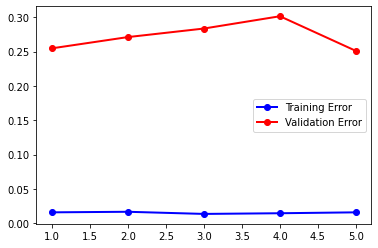

In [5]:
x = [1,2,3,4,5]
plt.plot( x, training_errors, marker = 'o', color='blue', linewidth=2, label = "Training Error")
plt.plot( x, validation_errors, marker = 'o', color='red', linewidth=2, label="Validation Error")
plt.legend()
# From the plot we can see that the model is overfitted. 

In [6]:
cv = CountVectorizer()
x_train_mat = cv.fit_transform(train_ds)
#X_test_docMan = cv.transform(X_test)

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(x_train_mat, train_labels) 


LogisticRegression(C=30.0, class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, random_state=40, solver='newton-cg')

In [7]:
import pickle
lr_model_pkl_name = 'TrainedModels/LR_Disaster.pkl'
pickle.dump(clf, open(lr_model_pkl_name, 'wb'))

In [8]:
################################################
## Working on Test data. 
##
################################################

In [9]:
test_tweets = pd.read_csv('../Data/clean_test.csv', header = 'infer', delimiter = ',')

In [10]:
test_tweets

,id,text
0,0,just happen a terribl car crash
1,2,heard about earthquak is differ citi stay safe...
2,3,there is a forest fire at spot pond gees are f...
3,9,apocalyps light spokan wildfir
4,11,typhoon soudelor kill 28 in china and taiwan
...,...,...
3258,10861,earthquak safeti lo angel safeti fasten xrwn
3259,10865,storm in ri wors than last hurrican my citi am...
3260,10868,green line derail in chicago
3261,10874,meg issu hazard weather outlook hwo


In [11]:
test_ds = test_tweets['text']


In [12]:
X_test_mat = cv.transform(test_ds)

lr_model_pkl_name = 'TrainedModels/LR_Disaster.pkl'
loaded_model = pickle.load(open(lr_model_pkl_name, 'rb'))
result = loaded_model.predict(X_test_mat)
print(result)

[1 1 1 ... 1 1 0]


In [14]:
predicted_df = pd.DataFrame(columns = ['id', 'target'])
predicted_df['target'] = result
predicted_df['id'] = test_tweets['id']

predicted_df.to_csv('../Data/results_lr.txt', index = False)